In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
data = pd.read_csv('white_wine.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


In [3]:
data['label'] = np.where(data['quality'] > 6,1,0)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,0


<AxesSubplot:xlabel='density', ylabel='alcohol'>

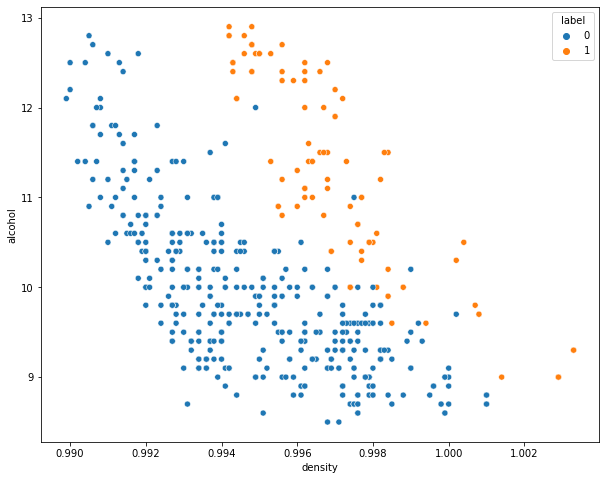

In [4]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = 'density', y = 'alcohol', data = data,hue = 'label')

In [5]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      1
sulphates               1
alcohol                 1
quality                 1
label                   0
dtype: int64

In [6]:
data['alcohol'].fillna(data['alcohol'].mean(), inplace = True)

In [7]:
X = data[['alcohol','density']]
Y = data['label']

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [9]:
XTrain, XTest, YTrain, YTest = train_test_split(
    X,
    Y,
    stratify=Y,
    test_size=0.2,
    random_state = 2020
)
    

In [10]:
XTrain

,alcohol,density
325,10.5,0.9946
273,9.0,0.9949
287,9.0,1.0029
342,9.1,0.9962
323,10.4,0.9946
...,...,...
382,9.2,0.9969
426,10.4,0.9954
489,8.9,0.9962
311,12.5,0.9968


# KNN Model Without Scaling

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(XTrain, YTrain)

KNeighborsClassifier(n_neighbors=3)

In [13]:
knn

KNeighborsClassifier(n_neighbors=3)

In [14]:
y_predict_class = knn.predict(XTest)
y_predict_class

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [15]:
print(confusion_matrix(YTest, y_predict_class))

[[79  5]
 [ 5 15]]


In [16]:
print(classification_report(YTest,y_predict_class))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        84
           1       0.75      0.75      0.75        20

    accuracy                           0.90       104
   macro avg       0.85      0.85      0.85       104
weighted avg       0.90      0.90      0.90       104



In [17]:
print('Akurasi Model Adalah : ', round(accuracy_score(YTest,y_predict_class)*100,2))

Akurasi Model Adalah :  90.38


# KNN Model with scaling

In [18]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [19]:
scaler = MinMaxScaler()
scaler.fit(XTrain)
X_Train_Scaled = scaler.transform(XTrain)
X_Test_Scaled = scaler.transform(XTest)
# melakukan min max scaler, dimana patokannya adalah xtrain. 
# min & max nya diambil dr xtrain

In [20]:
X_Train_Scaled[:10]

array([[0.45454545, 0.34586466],
       [0.11363636, 0.36842105],
       [0.11363636, 0.96992481],
       [0.13636364, 0.46616541],
       [0.43181818, 0.34586466],
       [0.15909091, 0.63909774],
       [0.56818182, 0.12781955],
       [0.34090909, 0.45112782],
       [0.09090909, 0.46616541],
       [0.52272727, 0.15037594]])

In [21]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_Train_Scaled,YTrain)

KNeighborsClassifier(n_neighbors=3)

In [22]:
y_predict_class_transform = knn.predict(X_Test_Scaled)

In [23]:
print(confusion_matrix(YTest, y_predict_class_transform))
print(classification_report(YTest, y_predict_class_transform))
print('Akurasi Model Adalah : ', round(accuracy_score(YTest,y_predict_class_transform)*100,2))

[[83  1]
 [ 1 19]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        84
           1       0.95      0.95      0.95        20

    accuracy                           0.98       104
   macro avg       0.97      0.97      0.97       104
weighted avg       0.98      0.98      0.98       104

Akurasi Model Adalah :  98.08


# Choose Factor K

In [24]:
k = range(1,30,2)
testing_accuracies = []
training_accuracies = []

In [25]:
score = 0

for i in k:
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_Train_Scaled,YTrain)

  y_predict_train = knn.predict(X_Train_Scaled)
  training_accuracies.append(accuracy_score(YTrain,y_predict_train))

  y_predict_test = knn.predict(X_Test_Scaled)
  acc_score = accuracy_score(YTest,y_predict_test)
  testing_accuracies.append(acc_score)

  if score < acc_score:
    score = acc_score
    best_k = i

In [26]:
print("best K : ",best_k)
print('Akurasi : ',round(score*100,2))

best K :  17
Akurasi :  99.04
